<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

***
**Matplotlib module**

https://matplotlib.org/stable/index.html


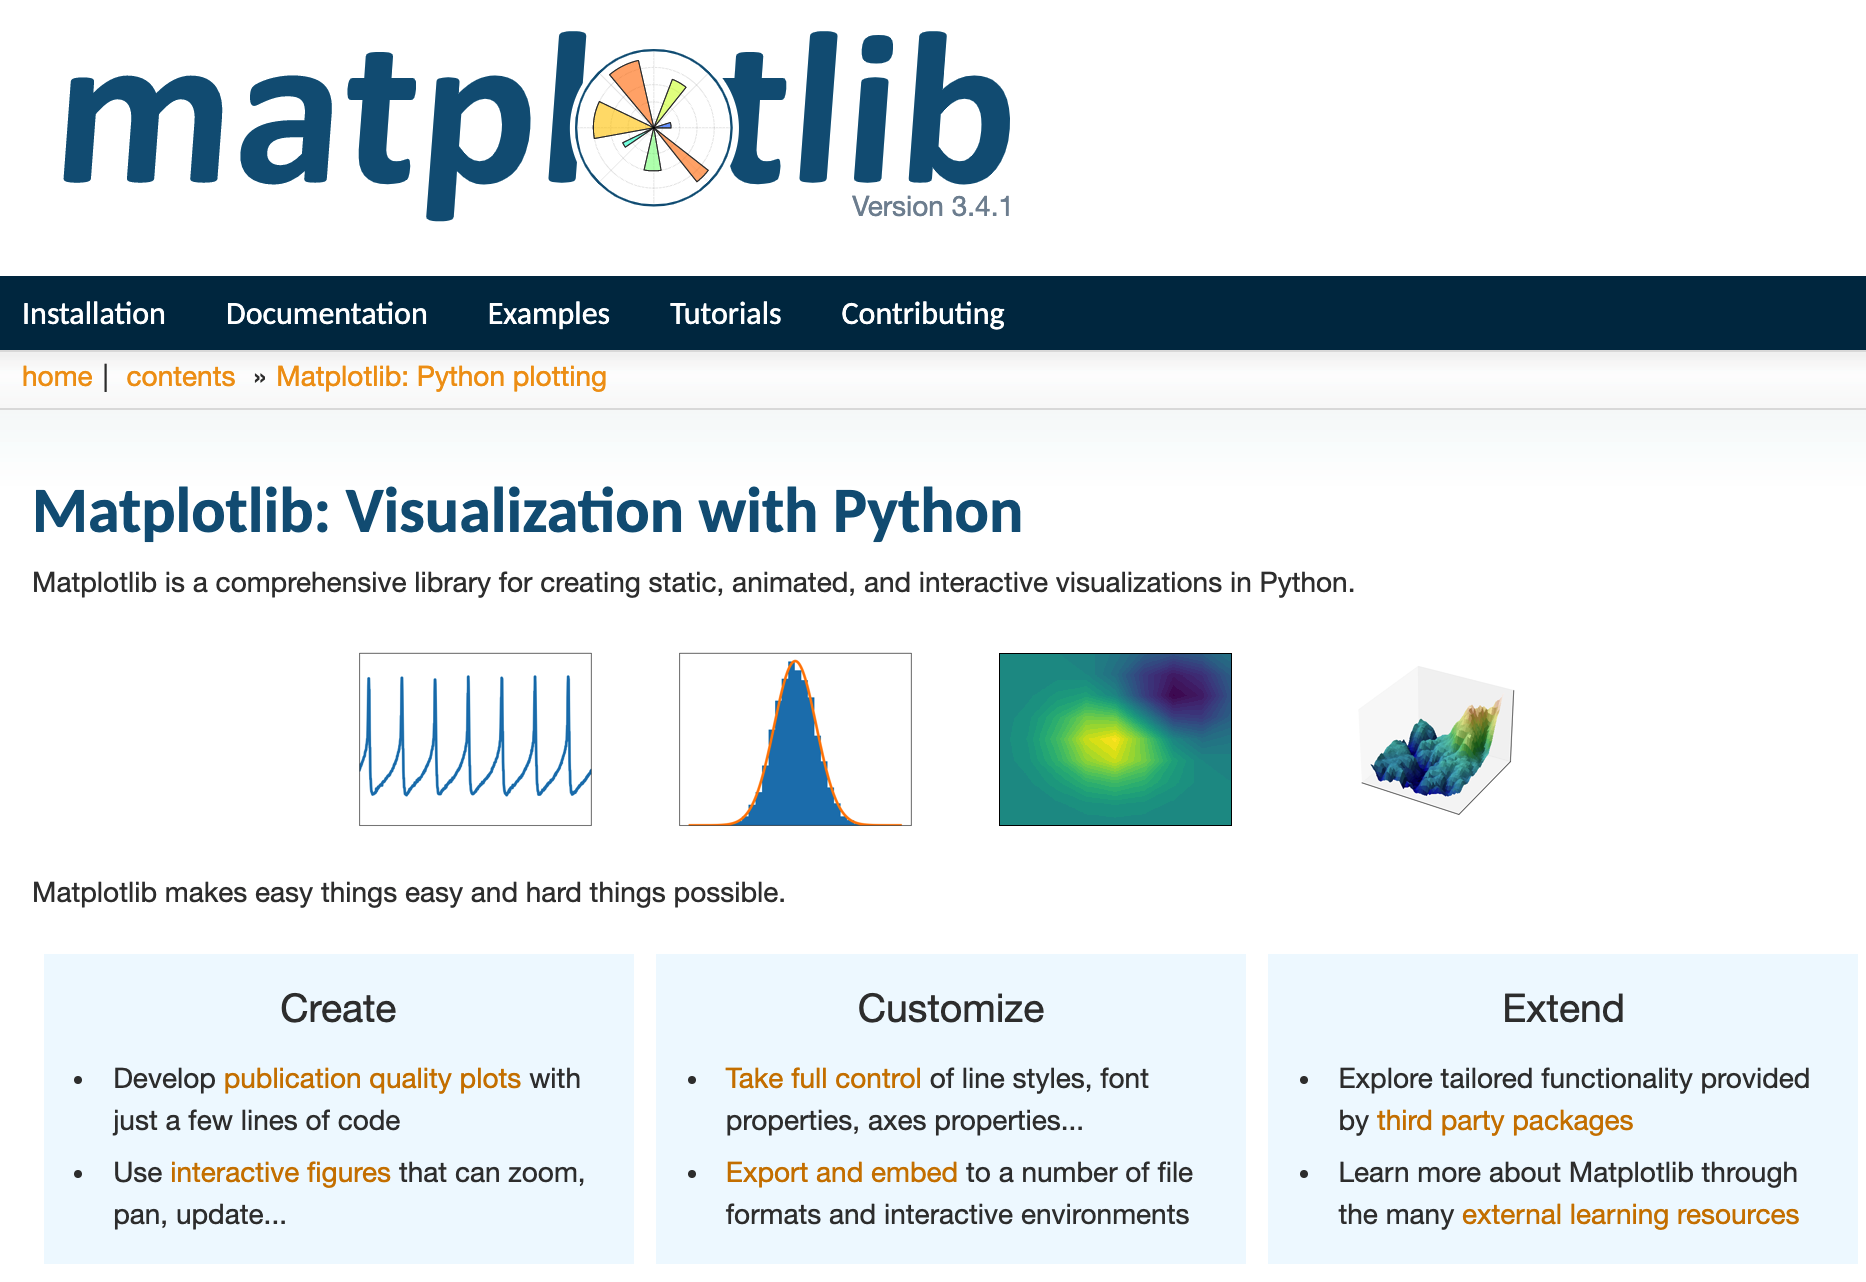

***
Check the gallery for getting a glimpse of what you can do with matplotlib!

https://matplotlib.org/stable/gallery/index.html

***
Need to **import the module** and define some convenient abbreviations

In [203]:
import matplotlib.pyplot as plt  # import the module

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 130  # set the resolution to x dpi

***
Let's read a **CSV file** with financial data. We want to inspect the behaviors of a few indicators, such as the closing value, the opening value, and the trade volume.

In [204]:
f = open('AAPL.csv')

***
Let's deal with the file *without* using the methods from the `csv` module (just for the sake of playing a bit with string methods!)

The first line of the file, the header, contains the names/descriptions of the fields (the columns of the dataset)

In [205]:
header = f.readline()

In [206]:
header

'Date,Open,High,Low,Close,Adj Close,Volume\n'

***
It's a *comma* separated values file, therefore, we can extract the individual fields by splitting on `','`

In [207]:
fieldnames = header.split(',')

In [208]:
fieldnames

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume\n']

***
Not exacty what we'd like to have: there's a `\n` character that we don't want. 

Moreover, what about the potential presence of white spaces?

In [209]:
f.seek(0)
header = f.readline()
fieldnames = header[:-1].split(',')
fieldnames

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

***
We can read now the file record by record and store the values of the columns `Date, Open, Close, Volume` in different lists (note  that we will exploit the knowledge of what content is reported in a column). 

Apart from `Date`, all values (that are read as strings) are numeric, such that are casted as floats. 

In [210]:
open_val = []
close_val = []
volume = []
dates = []

for record in f:
        fields = record.split(',')
        
        #print(fields)
        
        dates.append(fields[0])
        open_val.append( float(fields[1]) )
        close_val.append( float(fields[4]) )
        volume.append( float(fields[6]) )
        

In [211]:
#open_val

***
How many records in total?

In [212]:
len(close_val)

253

***
How do we check what has happened for the Aplle shares? How do we inspect the data visually?
Let's make **data plots!**


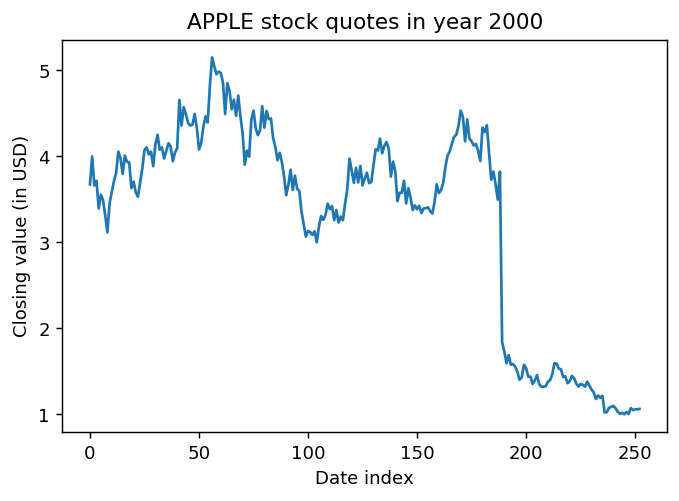

In [213]:
plt.title("APPLE stock quotes in year 2000")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label

plt.ylabel("Closing value (in USD)")  # y-axis label

plt.plot(close_val)

plt.show()

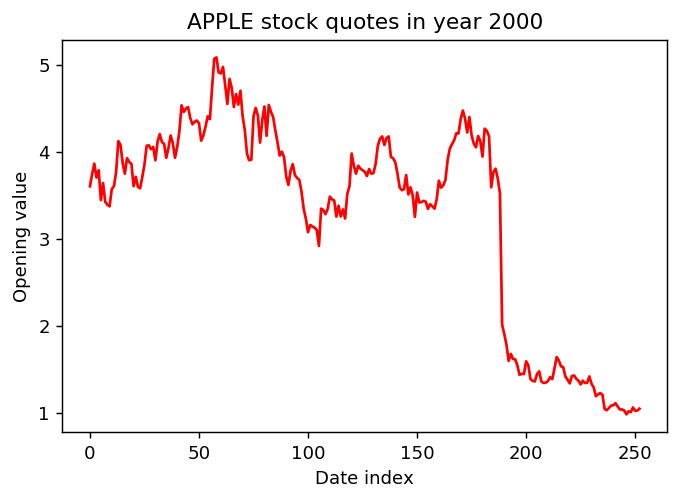

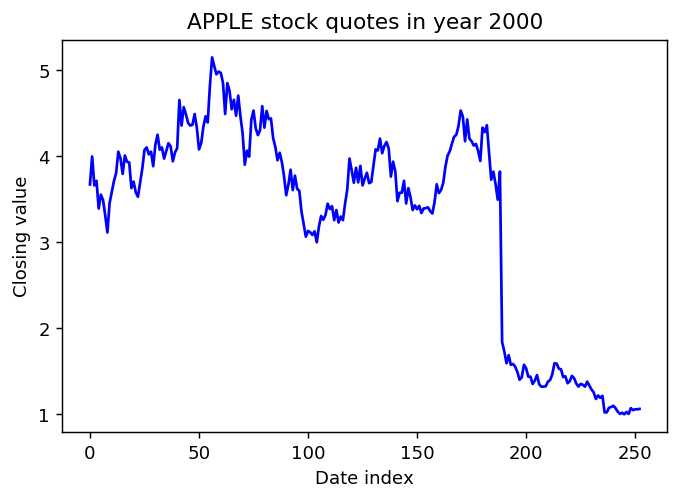

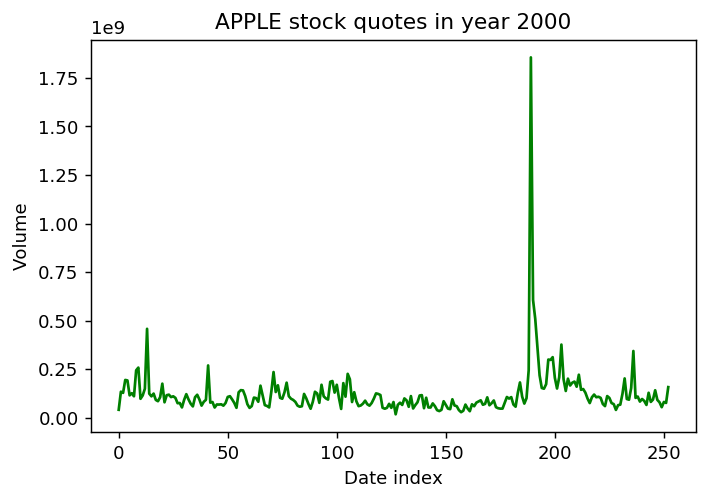

In [214]:
for p in [open_val, close_val, volume]:
    
    plt.title("APPLE stock quotes in year 2000")  # the title to give to the figure

    plt.xlabel("Date index")  # x-axis label

    if p == open_val:
        ylabel = "Opening value"
        color = 'red'
        
    elif p == close_val:
        ylabel = "Closing value"
        color = 'blue'
        
    else:
        ylabel = "Volume"
        color = 'green'
        
    plt.ylabel(ylabel)  # y-axis label

    plt.plot(p, color = color)

    plt.show()

***
Closing and opening values look similar, can we compare them in the same data plot? $\to$ **Multiple plots**


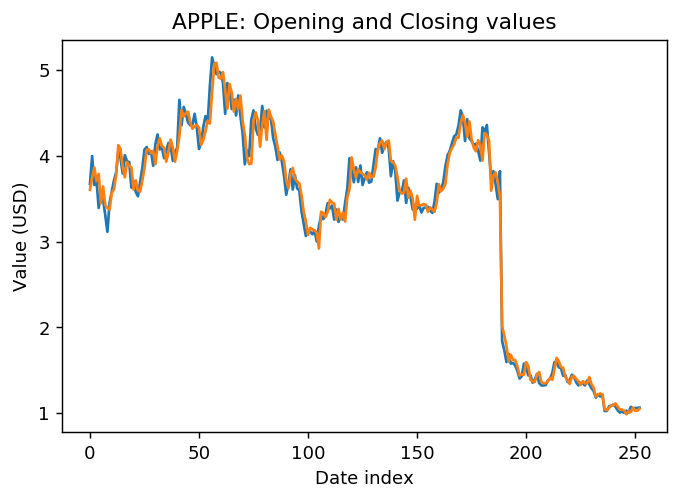

In [215]:
plt.title("APPLE: Opening and Closing values")  

plt.xlabel("Date index") 

plt.ylabel("Value (USD)") 

plt.plot(close_val)

plt.plot(open_val)

plt.show()

***
Can we improve readability by controlling **style / width of lines** and adding a **legend?**


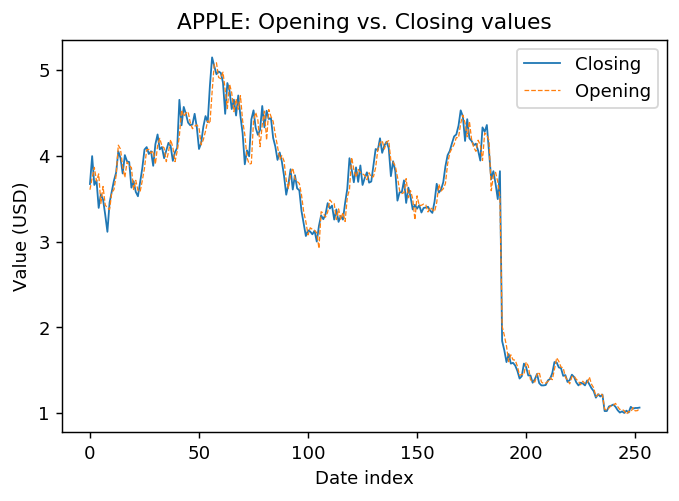

In [216]:
plt.title("APPLE: Opening vs. Closing values")  

plt.xlabel("Date index") 

plt.ylabel("Value (USD)") 

plt.plot(close_val, linewidth=1, label = 'Closing')

plt.plot(open_val, linewidth=0.7, linestyle='dashed', label = 'Opening')

plt.legend()

plt.show()

***
Different linestyles for the lines:

**Solid: '_'**

**Dotted: '.'**

**Dashed: '--'**

**Dashdot: '_.'**


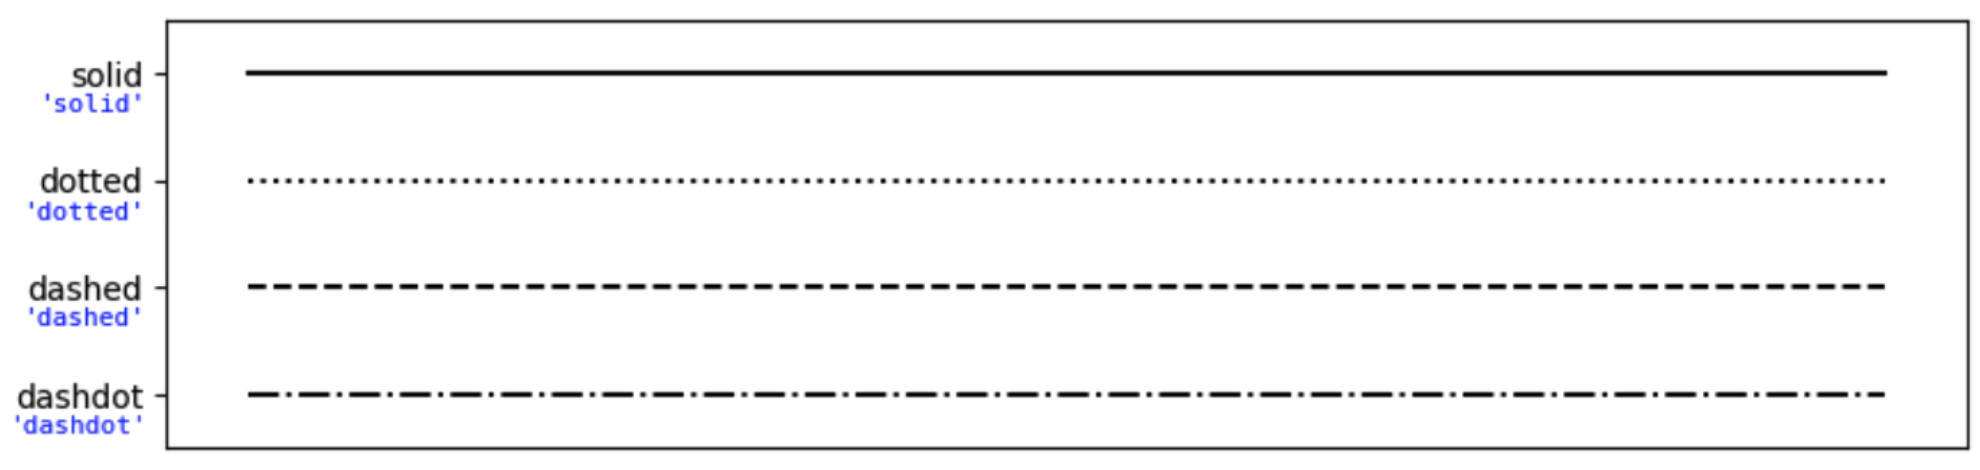

***
What about the **dates** on the x axis? Can we write them in a nice way? $\to$ **Control ticks/labels on the axes**

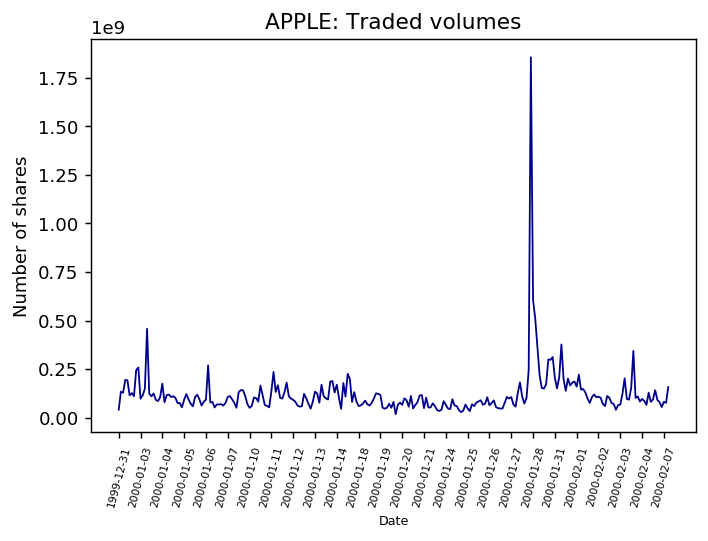

In [217]:
plt.title("APPLE: Traded volumes")

plt.xlabel("Date", fontsize=7) 

plt.ylabel("Number of shares") 

n_values = len(volume)
plt.xticks(range(0, n_values, 10), dates, 
           fontsize=6, rotation=75)

plt.plot(volume, linewidth=1, color = 'darkblue')


plt.show()

***
So far we have only plotted one time series of data. What about correlation between different series of paired data? $\to$ **$(x,y)$ data plots** showing $y$ vs. $x$ $\to$ **scatter plots**

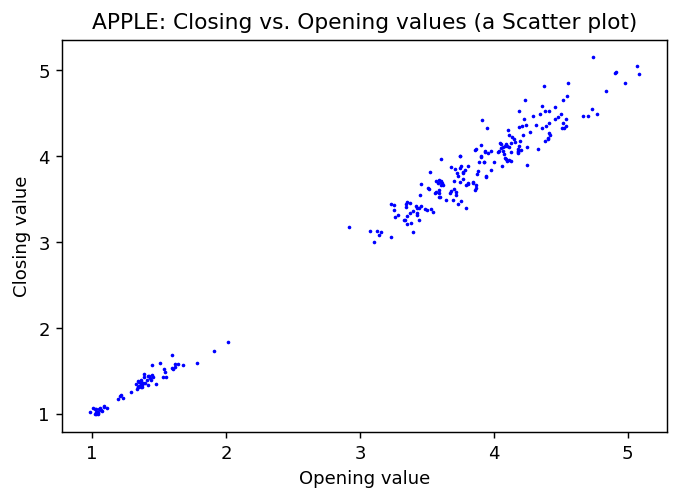

In [218]:
plt.title("APPLE: Closing vs. Opening values (a Scatter plot)")  

plt.xlabel("Opening value") 

plt.ylabel("Closing value") 

plt.scatter(open_val, close_val, marker='o', s=1, color='blue')

plt.show()

***
Volumes vs. Closing values, and using a different marker for the points.

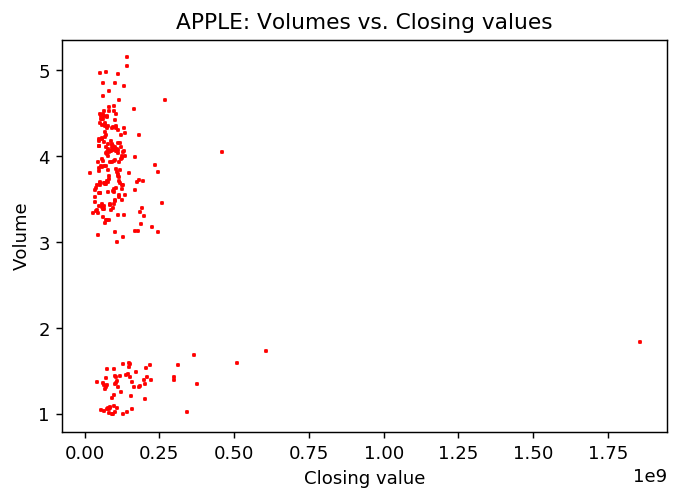

In [219]:
plt.title("APPLE: Volumes vs. Closing values")  

plt.xlabel("Closing value") 

plt.ylabel("Volume") 

plt.scatter(volume, close_val, marker='s', s=1, color='red')

plt.show()

***
How many **different markers** can we use? A lot! A the named parameter `s` defines the size of the marker. Try them out to see the effect!

In [220]:

# Many different markers are available for the shape of the data points
#    =============    ===============================
#    character        description
#    =============    ===============================
#    ``'.'``          point marker
#    ``','``          pixel marker
#    ``'o'``          circle marker
#    ``'v'``          triangle_down marker
#    ``'^'``          triangle_up marker
#    ``'<'``          triangle_left marker
#    ``'>'``          triangle_right marker
#    ``'1'``          tri_down marker
#    ``'2'``          tri_up marker
#    ``'3'``          tri_left marker
#    ``'4'``          tri_right marker
#    ``'s'``          square marker
#    ``'p'``          pentagon marker
#    ``'*'``          star marker
#    ``'h'``          hexagon1 marker
#    ``'H'``          hexagon2 marker
#    ``'+'``          plus marker
#    ``'x'``          x marker
#    ``'D'``          diamond marker
#    ``'d'``          thin_diamond marker
#    ``'|'``          vline marker
#    ``'_'``          hline marker
#    =============    ===============================

***
Plots with **lines and point markers?**

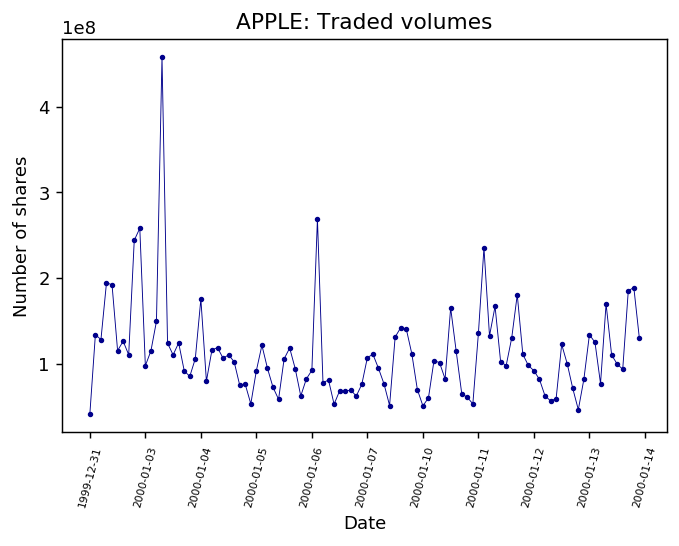

In [221]:
plt.title("APPLE: Traded volumes")

plt.xlabel("Date") 

plt.ylabel("Number of shares") 

n_values = len(volume)
plt.xticks(range(0, n_values, 10), dates, 
           fontsize=6, rotation=75)

plt.plot(volume[0:100], 
         marker = 'o', markersize=2, 
         linewidth=0.5, color = 'darkblue')


plt.show()

***
We can also change the **colors of the markers (borders and inside).**

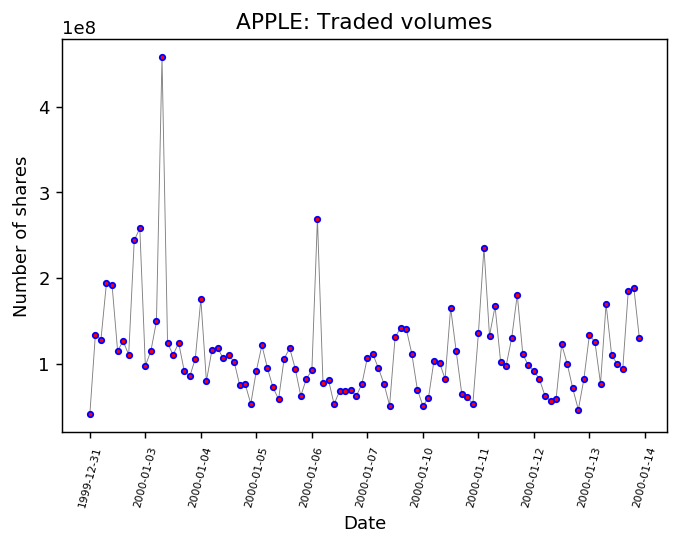

In [231]:

plt.title("APPLE: Traded volumes")

plt.xlabel("Date") 

plt.ylabel("Number of shares") 

n_values = len(volume)
plt.xticks(range(0, n_values, 10), dates, 
           fontsize=6, rotation=75)

plt.plot(volume[0:100], 
         marker = 'o', markersize=3, 
         markerfacecolor='r', markeredgecolor='blue',
         linewidth=0.5, color = 'gray')


plt.show()

***
Can we add a **grid** to read the values more clearly?

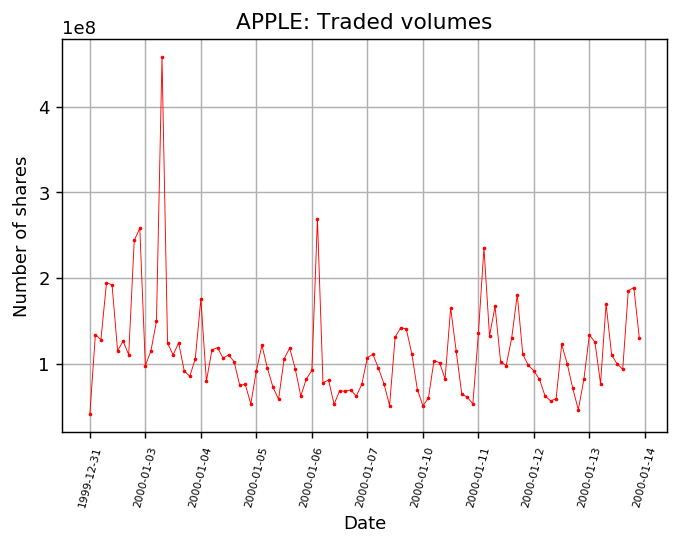

In [223]:
plt.title("APPLE: Traded volumes")

plt.xlabel("Date") 

plt.ylabel("Number of shares") 

n_values = len(volume)
plt.xticks(range(0, n_values, 10), dates, 
           fontsize=6, rotation=75)

plt.plot(volume[0:100], 
         marker = 'o', markersize=1,
         linewidth=0.5, color = 'red')

plt.grid()

plt.show()

***
What about **resizing** the plots and changing the font size of labels, etc.?

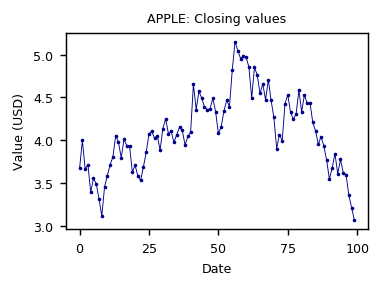

In [232]:
plt.figure ( figsize = (3,2))

scaled_fontsize = 7

plt.title("APPLE: Closing values", fontsize=scaled_fontsize)

plt.xlabel("Date", fontsize=scaled_fontsize) 

plt.ylabel("Value (USD)", fontsize=scaled_fontsize) 

plt.plot(close_val[0:100], 
         marker = 'o', markersize=1,
         linewidth=0.5, color = 'darkblue')

plt.xticks(fontsize=scaled_fontsize)

plt.yticks(fontsize=scaled_fontsize)


plt.show()

***
# The cells belwoe haven't been presented during the class!

They are there to let you give it a look (for the project), in any case we'll go through them during the next lecture. 

***
Let's read another dataset, reporting **data about mall customers,** and let's use this time `csv` methods (it will be easier than before!)

In [251]:
import csv

f = open('Mall_Customers.csv')

f_csv = csv.reader(f)

In [252]:
fieldnames = next(f_csv)
print(fieldnames)

print(len(fieldnames))

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
5


In [253]:
gender = []
age = []
income  = []
score = []
customer_id = []

for record in f_csv:
        customer_id.append(record[0])
        
        gender.append(record[1].strip()) # .strip() removes all extra white spaces!
                      
        age.append( int(record[2]) ) 
        income.append( int(record[3]) )
        score.append( int(record[4]) )

In [254]:
#age

In [256]:
#gender

***
This is **not a time series** of data!

***
What about the distribution of the values of income?

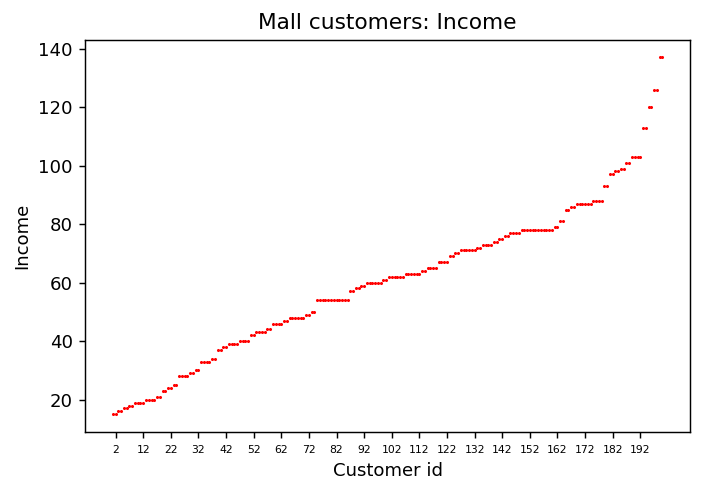

In [240]:
plt.title("Mall customers: Income")  

plt.xlabel("Customer id") 

plt.ylabel("Income") 

plt.scatter(customer_id, income, marker='o', s=0.5, color='red')

plt.xticks(customer_id[1::10], fontsize=6)

plt.show()

It looks like the income grows with the customer id! (values have been sorted vs. the income)

***
What about the shopping scores?

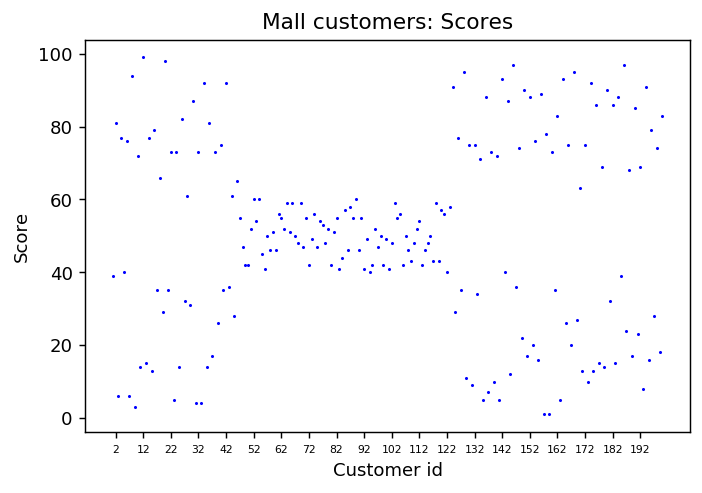

In [241]:
plt.title("Mall customers: Scores")  

plt.xlabel("Customer id") 

plt.ylabel("Score") 

plt.scatter(customer_id, score, marker='o', s=0.5, color='blue')

plt.xticks(customer_id[1::10], fontsize=6)

plt.show()

***
**Aggregating** the data to check what the **distribution** of the scores look like in the customer population can be useful $\to$ **Histogram**

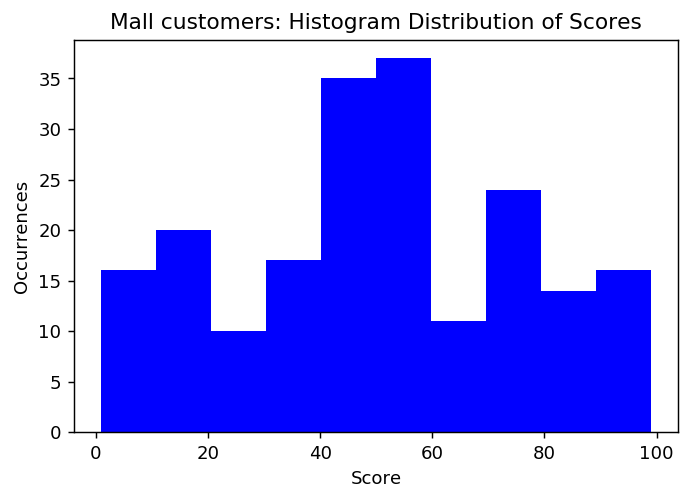

In [242]:
plt.title("Mall customers: Histogram Distribution of Scores")  

plt.xlabel("Score") 

plt.ylabel("Occurrences") 

plt.hist(score, bins=10, color='blue')

#plt.xticks(customer_id[1::10], fontsize=6)

plt.show()

***
What about the distribution of the age of the customers?

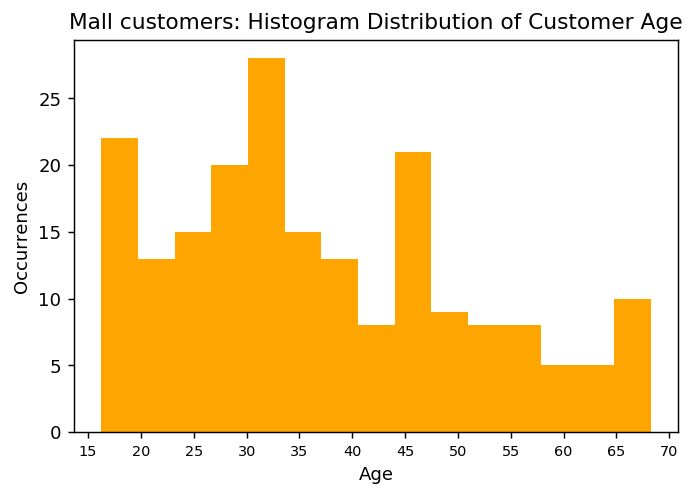

In [282]:

plt.title("Mall customers: Histogram Distribution of Customer Age")  

plt.xlabel("Age") 

plt.ylabel("Occurrences") 

plt.hist(age, bins=15, align='left',
         color='orange')

plt.xticks(range(15, 75, 5), fontsize=8)

plt.show()

***
What about the distribution of male vs. female?

In this case we have two values: number of male and number of female customers.

We need to count them from the `gender` list!


In [258]:
n_male = gender.count('Male')

n_female = gender.count('Female')

n_male, n_female

(88, 112)

***
How do we effectively show these proportions? (a histogram is not really appropriate for showing proportions)

- **Pie chart**

- **Bar chart**

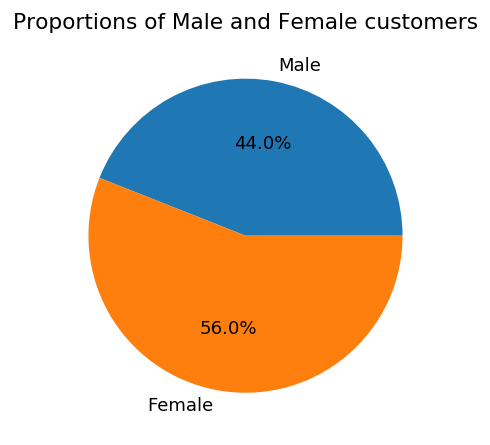

In [266]:

plt.title("Proportions of Male and Female customers")

plt.pie([n_male, n_female], 
        labels = ['Male', 'Female'], 
        autopct="%.1f%%")  # this says to use one decimal digit and to use percentages

plt.show()

***
Some beautifying of the pie chart. 

`shadow` adds a shadowing, while `explode` is tuple, where if the i-th value is greater than 0, it indcates that the i-th slice of the pie will be detached from the rest of the pie (at a distance proportional to the indicated value).

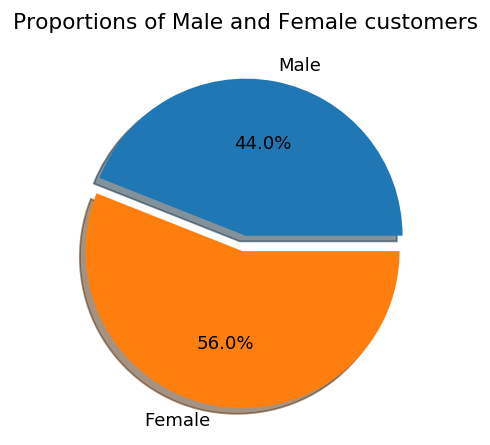

In [271]:
plt.title("Proportions of Male and Female customers")

plt.pie([n_male, n_female], 
        labels = ['Male', 'Female'], shadow=True, explode = (0, 0.1),
        autopct="%.1f%%") 

plt.show()

***
Can we make a pie chart for the customer age?

Yes, but we need to define age ranges, group / count the data accordingly, and store/define explanatory labels.

Let's consider 10-year ranges, starting from the minimal age up to the maximal age in the dataset.

We'll use a dictionary data structure.



In [317]:
import math

min_age = min(age)
max_age = max(age)

age_interval = 10

age_ranges = (max_age - min_age) / age_interval

age_ranges = math.ceil(age_ranges)
print(min_age, max_age, age_ranges)

18 70 6


In [318]:
age_dict = {}

for r in range(age_ranges):
        range_min = min_age + r * age_interval
        range_max = range_min + age_interval - 1
        range_str = str(range_min) + '-' + str(range_max)
        age_dict[ range_str ] = [range_min, range_max, 0]

In [319]:
age_dict

{'18-27': [18, 27, 0],
 '28-37': [28, 37, 0],
 '38-47': [38, 47, 0],
 '48-57': [48, 57, 0],
 '58-67': [58, 67, 0],
 '68-77': [68, 77, 0]}

In [320]:
for v in age:
    for r in age_dict:
        if v >= age_dict[r][0] and v <= age_dict[r][1]:
            age_dict[r][2] += 1
            break
            

In [321]:
age_dict

{'18-27': [18, 27, 46],
 '28-37': [28, 37, 61],
 '38-47': [38, 47, 36],
 '48-57': [48, 57, 31],
 '58-67': [58, 67, 20],
 '68-77': [68, 77, 6]}

***
Now we can show the counts in the selected ranges of age as proportions using a pie chart.

Counts are stored in the list `age_counts`

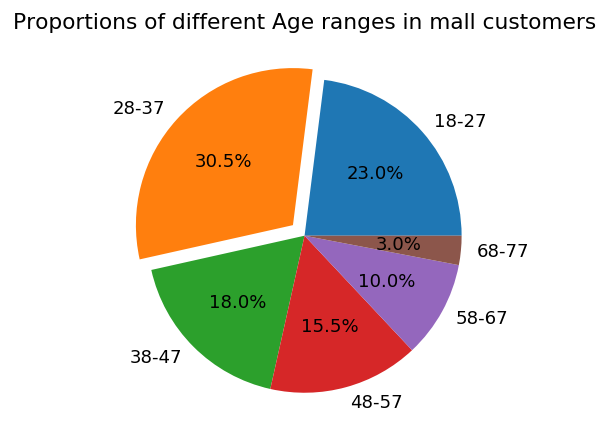

In [339]:
plt.title("Proportions of different Age ranges in mall customers")

age_counts = []
for r in age_dict.values():
    age_counts.append(r[2])

# this is to identify the slice with the largest proportion to explode it
max_range = -1
max_range_idx = -1
for i,r in enumerate(age_dict.values()):
    if r[2] > max_range:
        max_range = r[2]
        max_range_idx = i

explode_flag = [0] * len(age_dict)
explode_flag[max_range_idx] = 0.1        
    
    
plt.pie(age_counts, 
        labels = list(age_dict.keys()), 
        #shadow=True, 
        explode = explode_flag,
        autopct="%.1f%%")

plt.show()

***
We can display the same data using a **bar chart.**

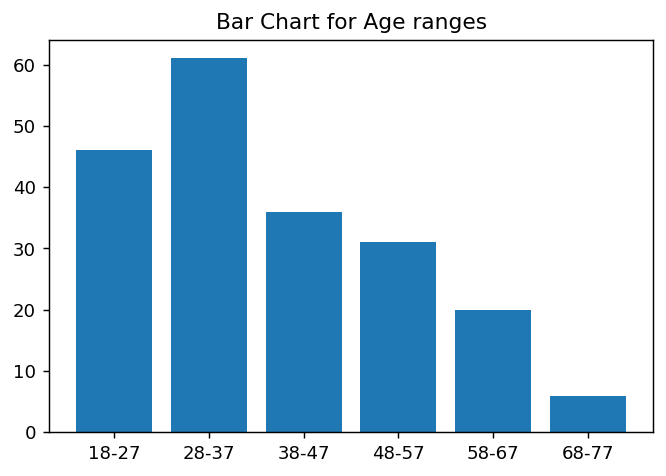

In [337]:
plt.title("Bar Chart for Age ranges")

plt.bar(range(1, len(age_counts)+1),         # position of the bars
        age_counts,                          # value/height of the bars
        tick_label = list(age_dict.keys()))  # what to display at the x ticks

plt.show()

***
Let's use directly `csv` methods to make our life easier!

In [ ]:
import csv

f = open('AAPL.csv')

f_csv = csv.reader(f)

In [244]:
import csv

f = open('AAPL.csv')

f_csv = csv.DictReader(f)

In [245]:
print(f_csv.fieldnames)

print(len(f_csv.fieldnames))


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
7


In [246]:
fields = dict.fromkeys(f_csv.fieldnames, 0)

In [247]:
for k in fields.keys():
    fields[k] = []

In [248]:
fields.keys()

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [249]:
fields

{'Date': [],
 'Open': [],
 'High': [],
 'Low': [],
 'Close': [],
 'Adj Close': [],
 'Volume': []}

In [250]:
f.seek(0)

next(f_csv)

for r in f_csv:
    for p in fields.keys():
        #print(r, p, r[p])
        if p == 'Date':
            fields[p].append(r[p])
        else:
            fields[p].append( float(r[p]) )


In [41]:
#fields['Volume']

In [254]:
len(fields['Volume'])

253

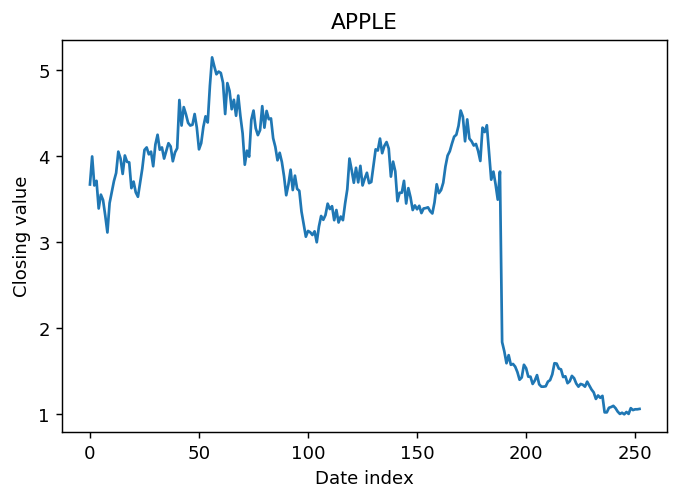

In [258]:
plt.title("APPLE")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label
plt.ylabel("Closing value")  # y-axis label

plt.plot(fields['Close'])

plt.show()

***


In [274]:
f = open('AAPL.csv')

f_csv = csv.reader(f)

fieldnames = next(f_csv) 

In [275]:
fieldnames

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [278]:
fieldnames_dict = {}
i = 0
for f in fieldnames:
    fieldnames_dict[f] = i
    i += 1

In [279]:
fieldnames_dict

{'Date': 0,
 'Open': 1,
 'High': 2,
 'Low': 3,
 'Close': 4,
 'Adj Close': 5,
 'Volume': 6}

In [280]:
fields = dict.fromkeys(fieldnames, 0)

for k in fields.keys():
    fields[k] = []

fields.keys()

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [ ]:
for r in f_csv:
    for p in fields.keys():
        if p == 'Date':
            fields[p].append(r[p])
        else:
            fields[p].append( float(r[p]) )


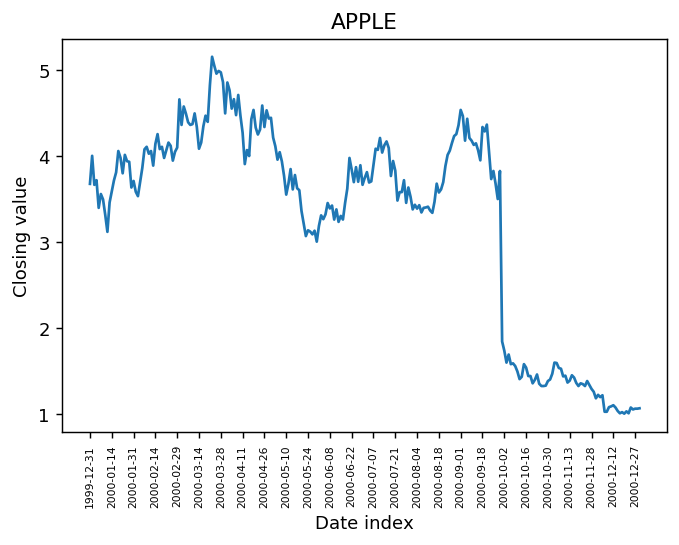

In [271]:
plt.title("APPLE")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label
plt.ylabel("Closing value")  # y-axis label

plt.plot(fields['Close'])

n_values = len(fields['Date'])
plt.xticks(range(0, n_values, 10), fields['Date'][::10], 
           fontsize=6, rotation=90)

plt.show()


In [ ]:
plt.title("My first graph")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label
plt.ylabel("Traded volume")  # y-axis label

plt.plot(fields['Volume'])

plt.show()

***
First graph: plotting some values

In [39]:
# the dataset
yvals = [1, 5, 6, 6, 5.5, 4, 3, 7, 11, 2.3, 1.2, 0.5, 9, 
         8.1, 7.7, 5.6, 3, 2.5, 3.1, 4, 5.2, 0.1, 12.1, 
         4.5, 10, 9.3, 0.9]

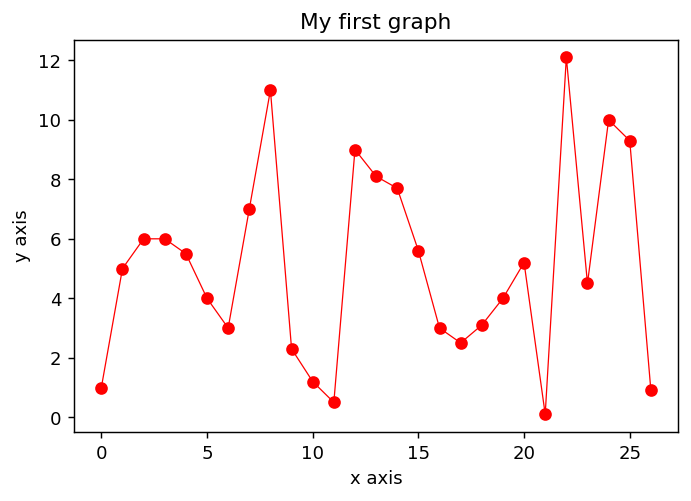

In [40]:
plt.title("My first graph")  # the title to give to the figure

plt.xlabel("x axis")  # x-axis label
plt.ylabel("y axis")  # y-axis label

plt.plot(yvals, marker='o', color='red', markersize=6, linewidth=0.7)

plt.show()

***
I don't like the markers! I don't want to specify options! $\to$ **Only default values**

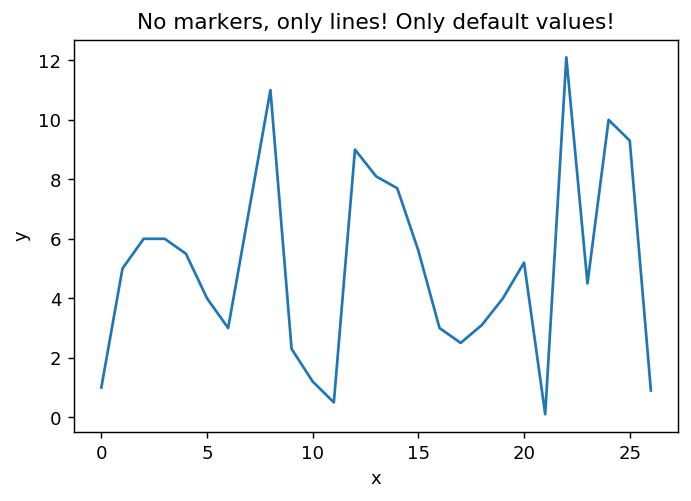

In [41]:
plt.title("No markers, only lines! Only default values!")  # the title to give to the figure

plt.xlabel("x")  # x-axis label
plt.ylabel("y")  # y-axis label

plt.plot(yvals)

plt.show()

***
We have two lists of data and we want to plot the $(x,y)$ pairs and connect them by a line

In [42]:
# the dataset
yvals = [1, 5, 6, 5.5, 4, 3, 7, 11, 2.3, 1.2]

xvals = [0.5, 1.5, 2, 2.5, 4, 5, 5.5, 7, 7.2, 9]

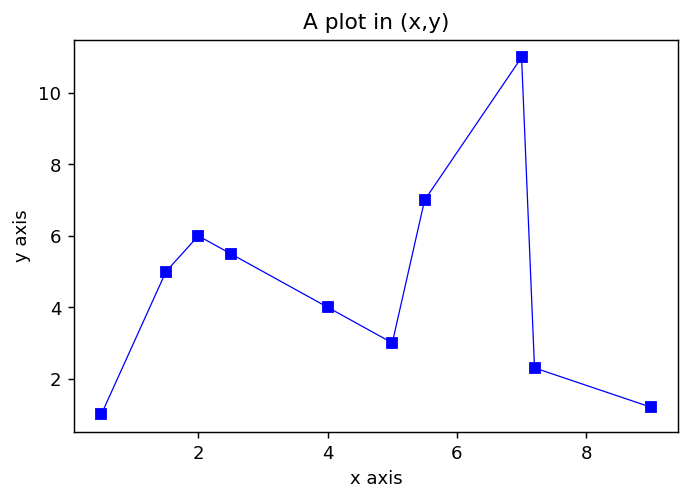

In [43]:
plt.title("A plot in (x,y)")  # the title to give to the figure

plt.xlabel("x axis")  # x-axis label
plt.ylabel("y axis")  # y-axis label

plt.plot(xvals, yvals, 
         marker='s', color='blue', markersize=6, linewidth=0.7)

plt.show()

***
What about plotting ONLY the points and NO lines? $\to$ **scatter plot**

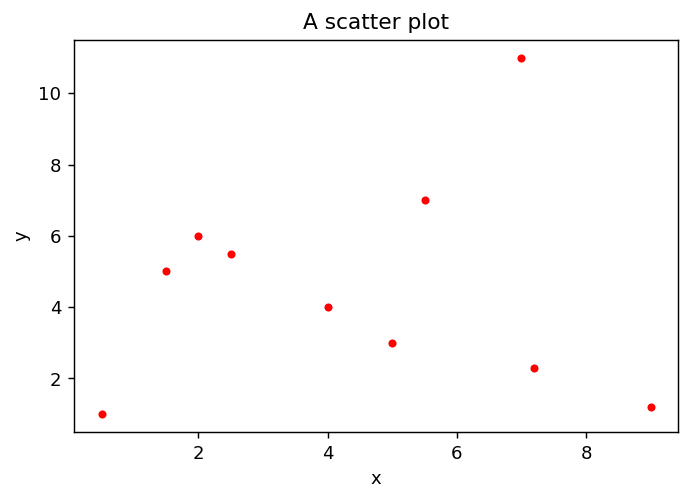

In [44]:
plt.title("A scatter plot") 

plt.xlabel("x")  # x-axis label
plt.ylabel("y")  # y-axis label

plt.scatter(xvals, yvals, marker='o', color='red', s=12)

plt.show()

***
What about adding a **grid** and a **legend**?


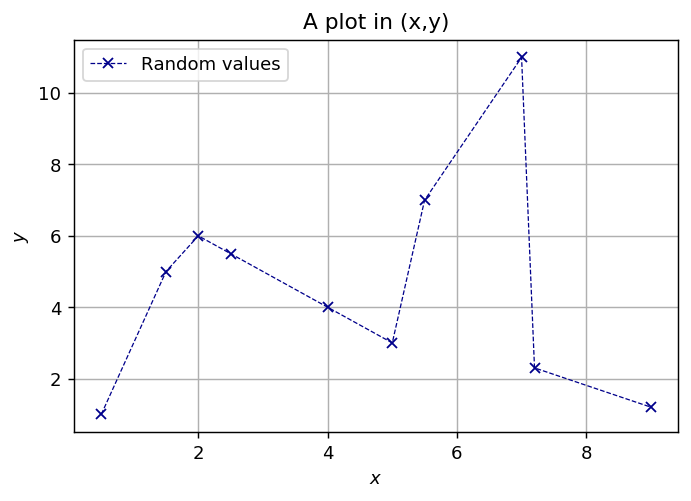

In [45]:
plt.title("A plot in (x,y)")  

plt.xlabel("$x$") 
plt.ylabel("$y$")  

plt.plot(xvals, yvals, 
         marker='x', color='darkblue', markersize=6, linewidth=0.7, linestyle='--',
         label='Random values')

plt.grid()

plt.legend()

plt.show()

***
What about **multiple plots** in the same figure?


Let's use first the `arange()` method!

In [46]:
import numpy as np

x = np.arange(-1, 10, 0.5)

y = []
for xi in x:
    y.append(2 * xi)
             

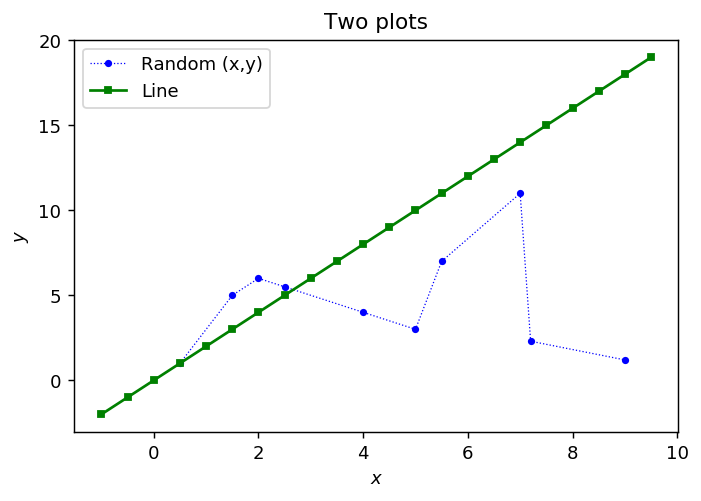

In [47]:
plt.title("Two plots")  

plt.xlabel("$x$")  
plt.ylabel("$y$")  

plt.plot(xvals, yvals, 
         marker='o', color='blue', markersize=3, linewidth=0.7, linestyle='dotted',
         label='Random (x,y)')

plt.plot(x, y,  
         marker='s', color='green', markersize=3, 
         label='Line')

plt.legend()

plt.show()

***
Some more interesting data? What abput *nicely* plotting a function?


In [48]:
x = np.arange(-5, 5, 0.1)

y = []
for xi in x:
    y.append(xi * xi)

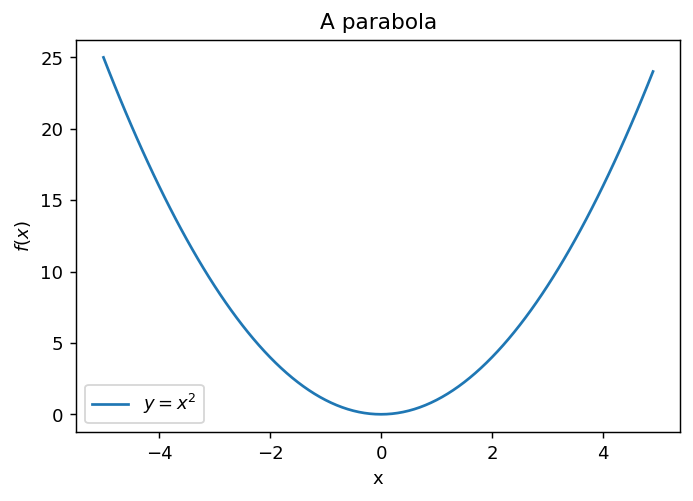

In [49]:
plt.title("A parabola")  

plt.xlabel("x")  
plt.ylabel("$f(x)$") 


plt.plot(x, y,  
         label='$y = x^2$')

plt.legend()

plt.show()

***
Can I control  **xticks** and **yticks**? 

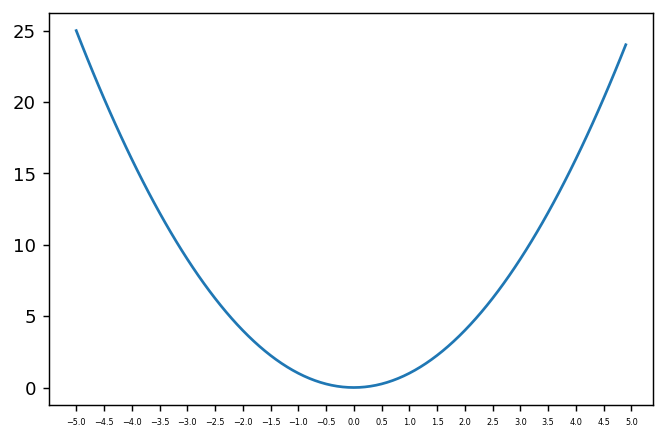

In [50]:
plt.xticks(np.arange(-5, 5.5, 0.5), fontsize=4.5)
        
plt.plot(x,y)

***
What about controlling the size of the figure?

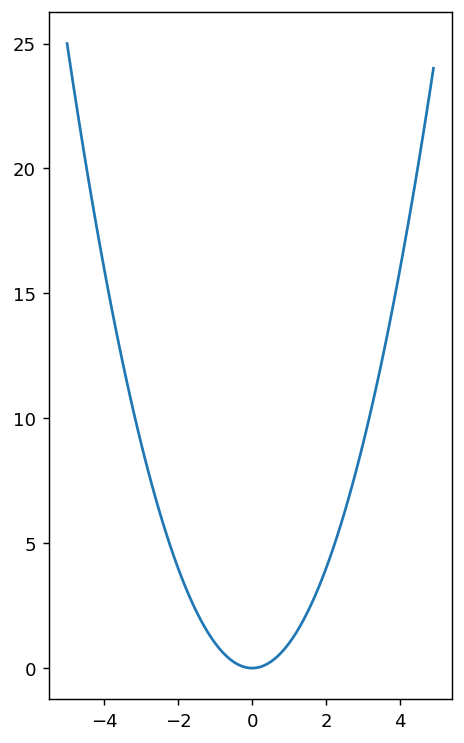

In [51]:
plt.figure( figsize= (4,7) )

plt.plot(x,y)

***
**Histogram** of the distribution of the values of the data


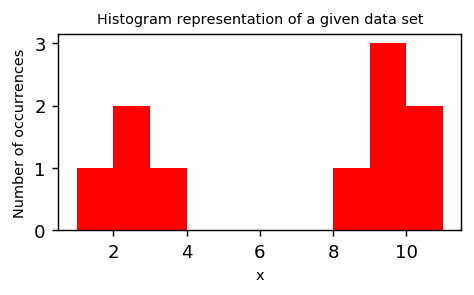

In [52]:
# the dataset
vals = [1, 2, 3, 8, 9, 11, 9, 9, 10, 2]

plt.figure(figsize = (4,2))
plt.title('Histogram representation of a given data set', fontsize=8)

ylabel = 'Number of occurrences'
plt.ylabel(ylabel, fontsize=8)
    
xlabel = 'x'
plt.xlabel(xlabel, fontsize=8)

nbins = 10
plt.hist(vals, nbins, density=False, color='red')

plt.show()

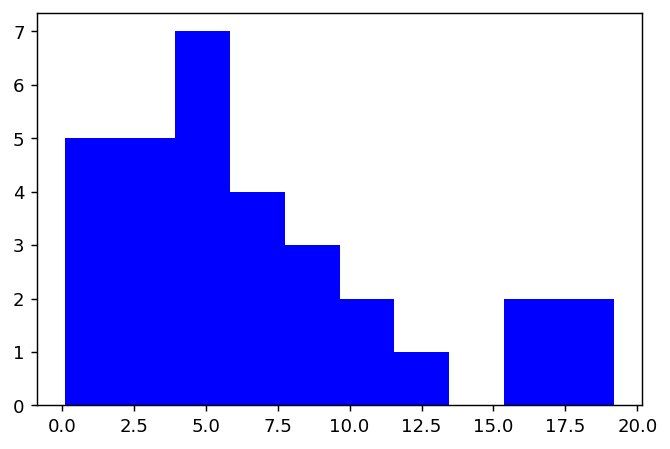

In [53]:
vals = [1, 5, 6, 6, 5.5, 4, 3, 7, 11, 2.3, 1.2, 0.5, 9, 18, 17, 19.2, 16.3,
         8.1, 7.7, 5.6, 3, 2.5, 3.1, 4, 5.2, 0.1, 12.1, 4.5, 10, 9.3, 0.9]

nbins = 10
plt.hist(vals, nbins, density=False, color='blue')

plt.show()

***
Let's read a CSV file!


In [54]:
f = open('Car_sales.csv')

In [55]:
next(f)

'Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor\n'

In [56]:
sales_usd = []

f.seek(0)
next(f)

for r in f:
    
    fields = r.split(',')
    
    if len(fields[5]) > 0:
        sales_usd.append(float(fields[5]))
    

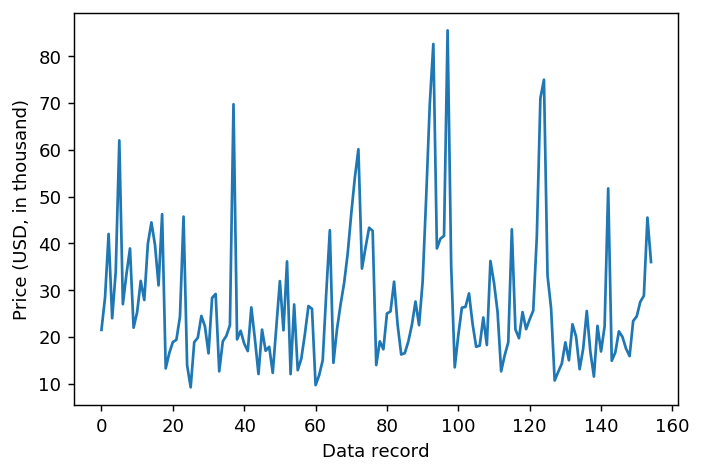

In [57]:
plt.xlabel('Data record')
plt.ylabel('Price (USD, in thousand)')
plt.plot(sales_usd)

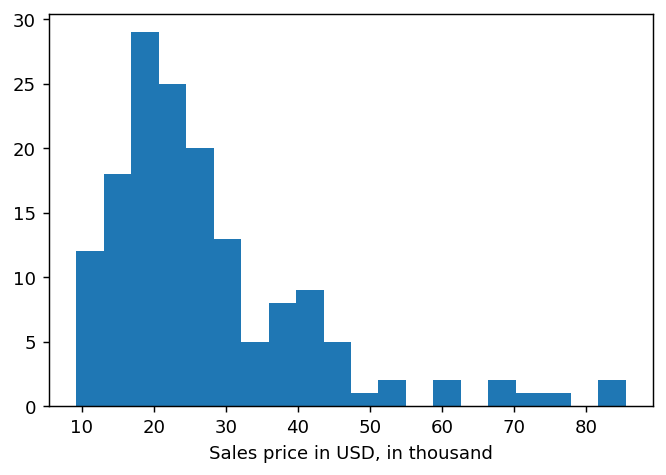

In [58]:
plt.hist(sales_usd, bins=20)

plt.xlabel('Sales price in USD, in thousand')
plt.show()

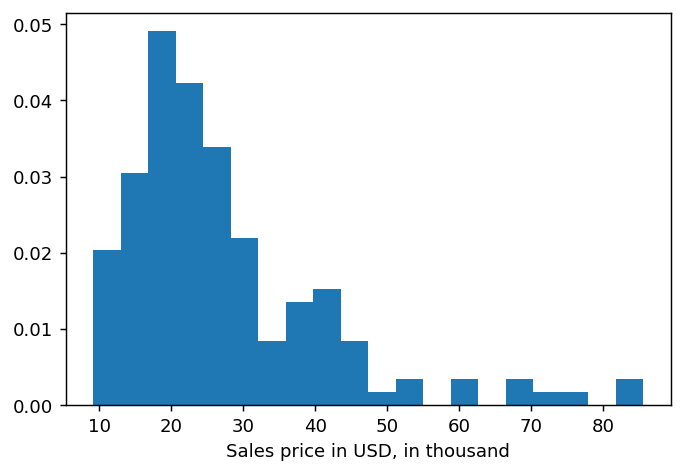

In [59]:
plt.hist(sales_usd, bins=20, density=True)

plt.xlabel('Sales price in USD, in thousand')
plt.show()

***
Let's read a more interesting file and use `csv` methods

In [60]:
import csv
f = open('zoological_attributes.csv')

f_csv = csv.DictReader(f)


In [61]:
f_csv.fieldnames

['name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [62]:
len(f_csv.fieldnames)

18

In [63]:
properties = dict.fromkeys(f_csv.fieldnames, 0)

In [64]:
properties

{'name': 0,
 'hair': 0,
 'feathers': 0,
 'eggs': 0,
 'milk': 0,
 'airborne': 0,
 'aquatic': 0,
 'predator': 0,
 'toothed': 0,
 'backbone': 0,
 'breathes': 0,
 'venomous': 0,
 'fins': 0,
 'legs': 0,
 'tail': 0,
 'domestic': 0,
 'catsize': 0,
 'type': 0}

In [65]:
properties.keys()

dict_keys(['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'])

In [66]:
f.seek(0)

next(f_csv)

for a in f_csv:
    for p in list(properties.keys())[1:]:
        #print(p, a)
        properties[p] += int(a[p])
        

In [67]:
properties

{'name': 0,
 'hair': 43,
 'feathers': 20,
 'eggs': 59,
 'milk': 41,
 'airborne': 24,
 'aquatic': 36,
 'predator': 56,
 'toothed': 61,
 'backbone': 83,
 'breathes': 80,
 'venomous': 8,
 'fins': 17,
 'legs': 287,
 'tail': 75,
 'domestic': 13,
 'catsize': 44,
 'type': 286}

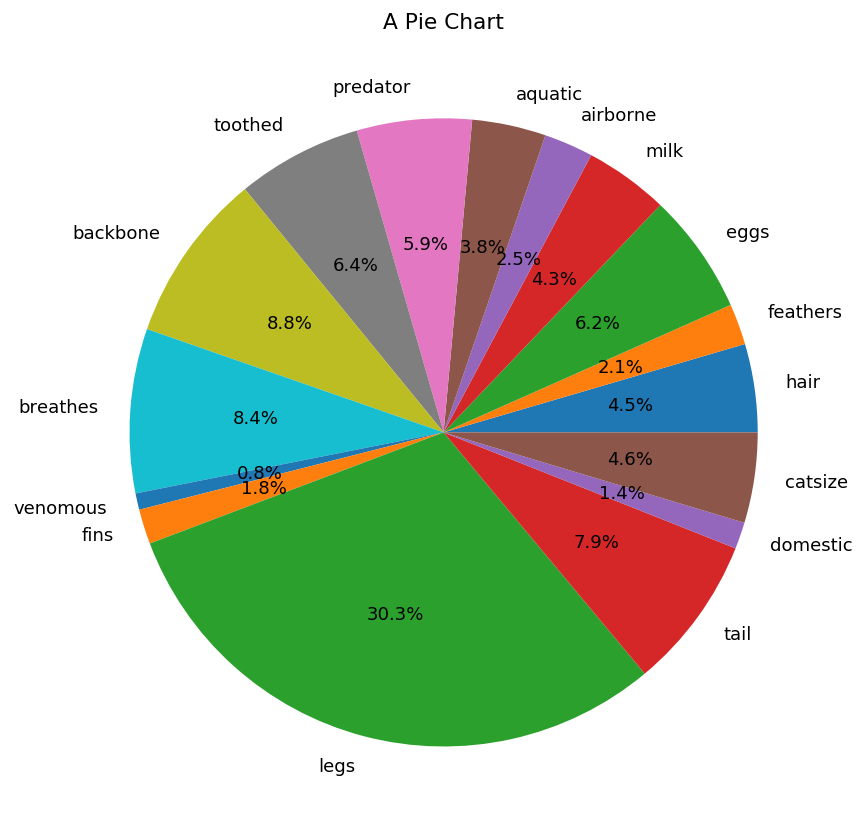

In [69]:
xsize = 8
ysize = 8
plt.figure(figsize=(xsize, ysize)) 
# Make the chart a circle, otherwise it'll be an ellipsis fir xsize different from ysize

plt.title("A Pie Chart")

plt.pie(list(properties.values())[1:-1], 
        labels=list(properties.keys())[1:-1], 
        autopct="%.1f%%")

plt.show()

***
A **pie chart** is an alternative representation

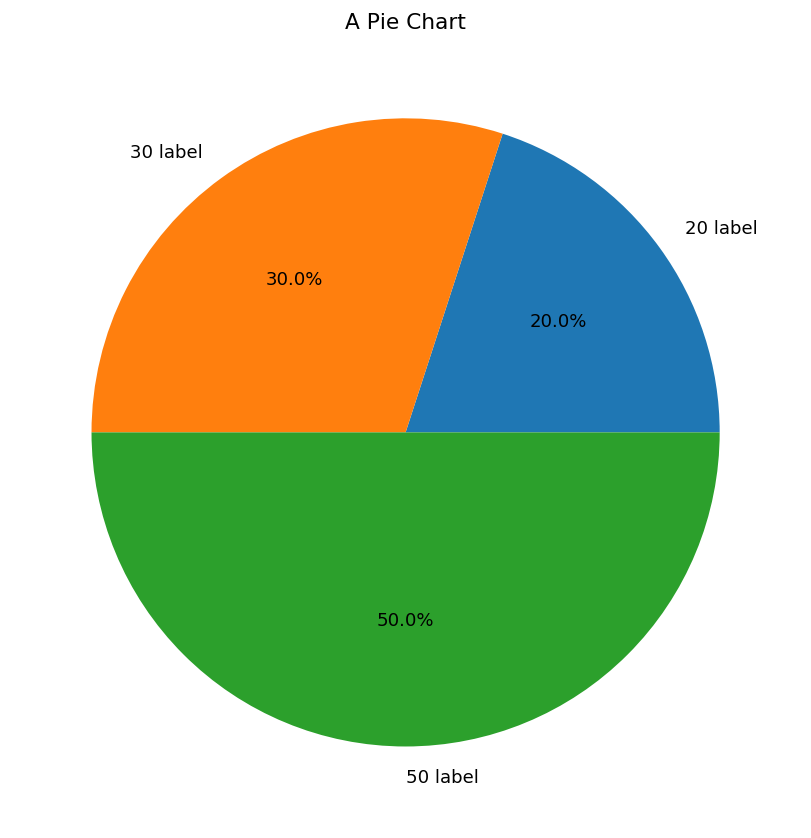

In [71]:
xsize = 8
ysize = 8
plt.figure(figsize=(xsize, ysize)) 
# Make the chart a circle, otherwise it'll be an ellipsis fir xsize different from ysize

plt.title("A Pie Chart")

plt.pie([20, 30, 50], 
        labels=["20 label", "30 label", "50 label"], 
        autopct="%.1f%%")

plt.show()

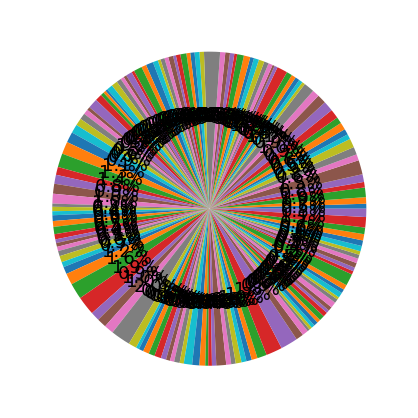

In [73]:
plt.pie(sales_usd,
        #labels=["20 label", "30 label", "50 label"], 
        autopct="%.1f%%")

plt.show()

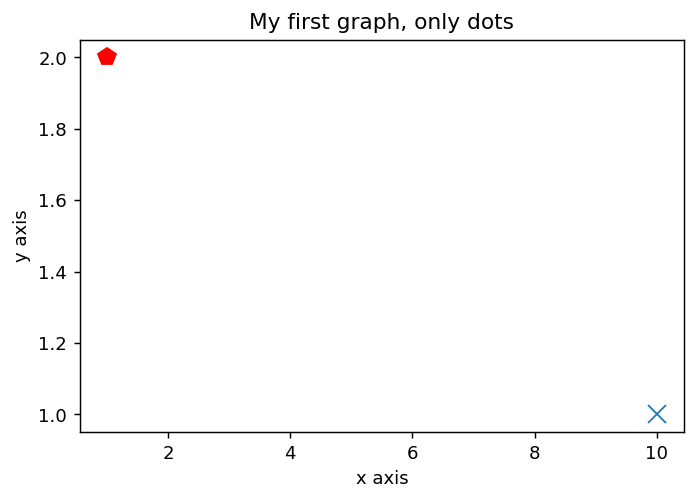

In [4]:
plt.title("My first graph, only dots")  # the title to give to the figure

plt.xlabel("x axis")  # x-axis label
plt.ylabel("y axis")  # y-axis label

plt.plot(1, 2, marker='p', color='red', markersize=10)

plt.plot(10, 1, marker='x', markersize=10)

plt.show()